In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import numpy as np

In [2]:
maths = pd.read_csv('Maths.csv')
portuguese = pd.read_csv('Portuguese.csv')

Let's look for blank rows

In [3]:
maths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [4]:
portuguese.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

No blank rows!

Now let's look for duplicates

In [5]:
maths[maths.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


In [6]:
portuguese[portuguese.duplicated()]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3


No duplicates row!

Now let's run a describe() method to spot outliers.

In [7]:
portuguese.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [8]:
maths.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


No shocking outliers here.

__Let's dive into the datas.__

rename columns for more clarity

In [9]:
maths.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [10]:
rename={'Pstatus':'Parent_status','Medu':'Mother_education','Fedu':'Father_education','Mjob':'Mother_Job',
        'Fjob':'Father_job','schoolsup':'Extra_school_support','famsup':'Family_support','paid':'extra_paid_courses',
        'higher':'higher_ed_goal','famrel':'family_relation','Dalc':'workday_alcool','Walc':'weekend_alcool'}

In [11]:
maths.rename(columns=rename,inplace=True)

In [12]:
portuguese.rename(columns=rename,inplace=True)

In [13]:
dic = {'U':'Urban','R':'Rural','F':'Female','M':'Male'}

In [14]:
maths.address = maths.address.map(dic)

In [15]:
portuguese.address = portuguese.address.map(dic)

In [16]:
maths.sex = maths.sex.map(dic)

In [17]:
portuguese.sex = portuguese.sex.map(dic)

__Summary statistics__ for age, mother and father education level, absences, and the grade 1, 2 and 3.

In [18]:
maths.loc[:,['age','Mother_education','Father_education','absences','G1','G2','G3']].describe()

,age,Mother_education,Father_education,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,75.000000,19.000000,19.000000,20.000000


In [19]:
portuguese.loc[:,['age','Mother_education','Father_education','absences','G1','G2','G3']].describe()

,age,Mother_education,Father_education,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,32.000000,19.000000,19.000000,19.000000


Let's dive into some datas distribution now

1) __Grade 3__ distribution

In [20]:
plt.style.use('seaborn')

C:\Users\chimb\AppData\Local\Temp\ipykernel_60408\240305066.py:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


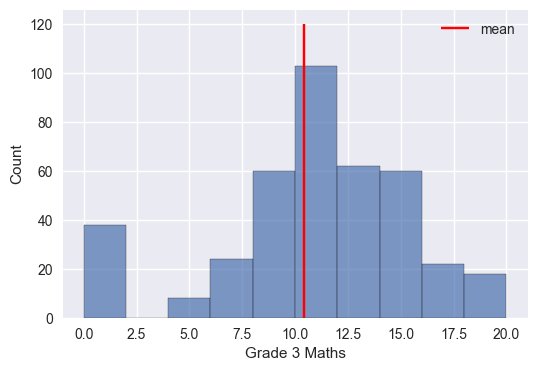

In [28]:
plt.figure(figsize=(6,4))
maths.G3.hist(edgecolor='black',alpha=0.7)
plt.xlabel('Grade 3 Maths')
plt.vlines(np.mean(maths.G3),ymin=0,ymax=120,label='mean',colors='red')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
maths.groupby('sex').G3.mean()

sex
Female     9.966346
Male      10.914439
Name: G3, dtype: float64

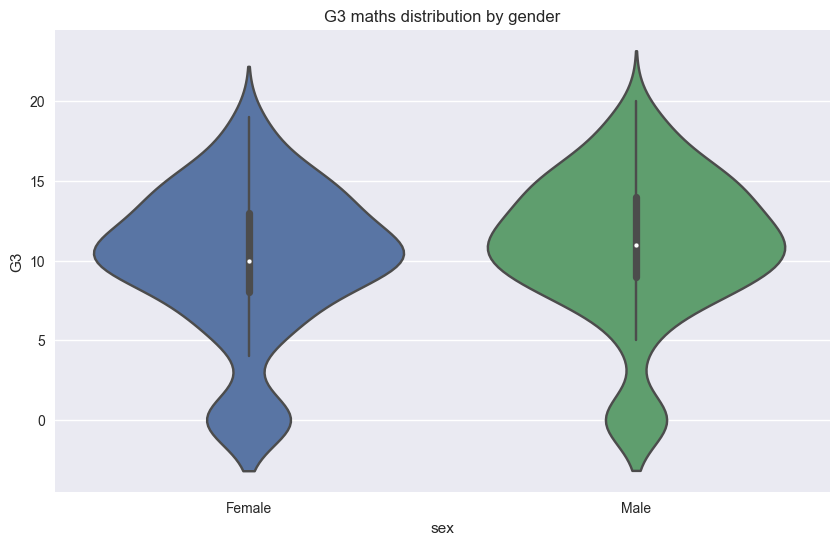

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='sex',y='G3',dodge=True)
plt.title('G3 maths distribution by gender')
plt.show()

In [ ]:
maths.groupby('address').G3.mean()

address
Rural     9.511364
Urban    10.674267
Name: G3, dtype: float64

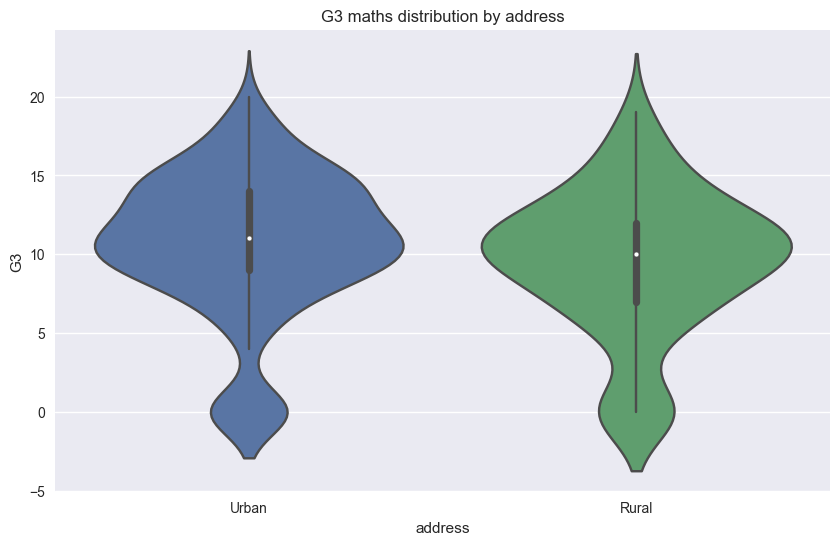

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='address',y='G3',dodge=True)
plt.title('G3 maths distribution by address')
plt.show()

The grade 3 in maths seems to have a normalize distribution. 
__Male have better grade distribution than female and people living in the urban area have a better grade distribution than 
people living in the rural area.__

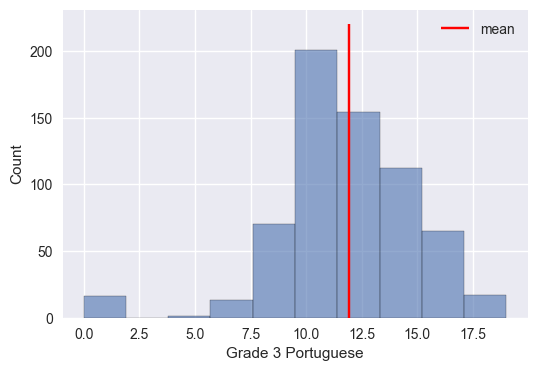

In [35]:
plt.figure(figsize=(6,4))
portuguese.G3.hist(edgecolor='black',alpha=0.6)
plt.vlines(np.mean(portuguese.G3),ymin=0,ymax=220,label='mean',colors='red')
plt.xlabel('Grade 3 Portuguese')
plt.ylabel('Count')
plt.legend()
plt.show()

In [ ]:
portuguese.groupby('sex').G3.mean()

sex
Female    12.253264
Male      11.406015
Name: G3, dtype: float64

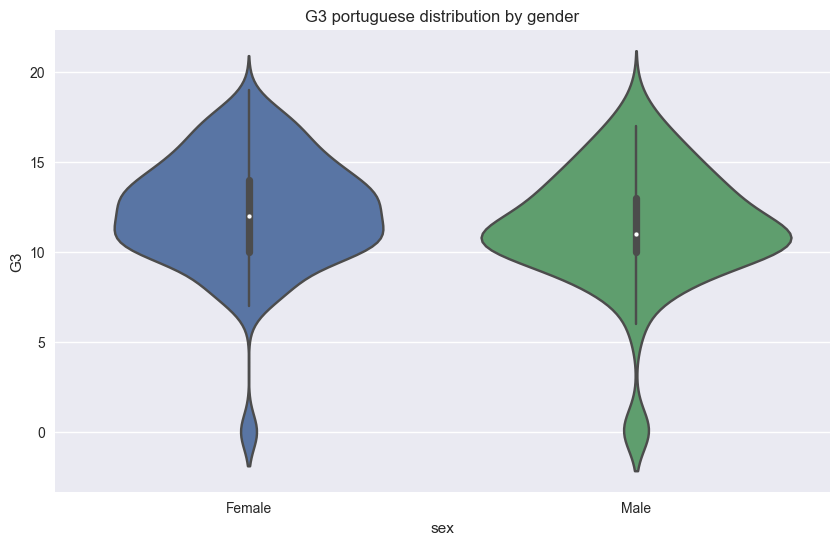

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='sex',y='G3',dodge=True)
plt.title('G3 portuguese distribution by gender')
plt.show()

In [ ]:
portuguese.groupby('address').G3.mean()

address
Rural    11.086294
Urban    12.263274
Name: G3, dtype: float64

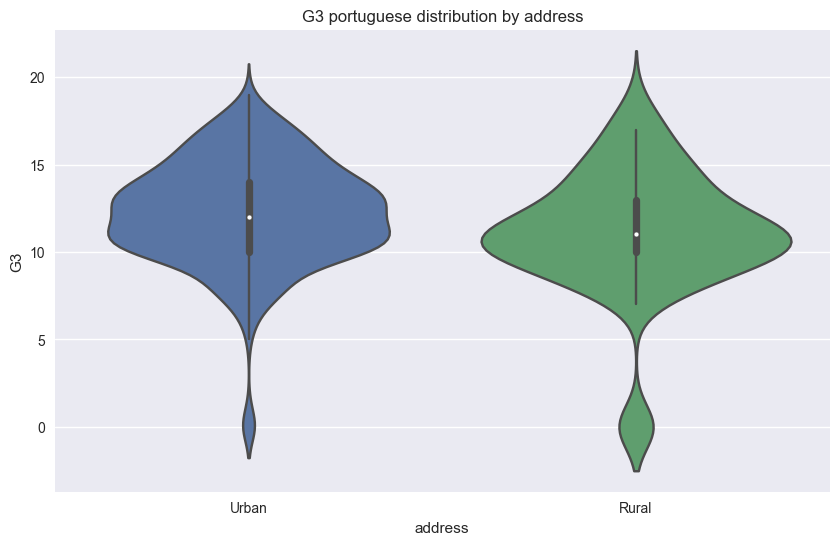

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='address',y='G3',dodge=True)
plt.title('G3 portuguese distribution by address')
plt.show()

The grade 3 in portuguese seems to have a normalize distribution. 
__Female have better grade distribution than male and people living in the urban area have a better grade distribution than 
people living in the rural area.__

2) __Age__ distribution

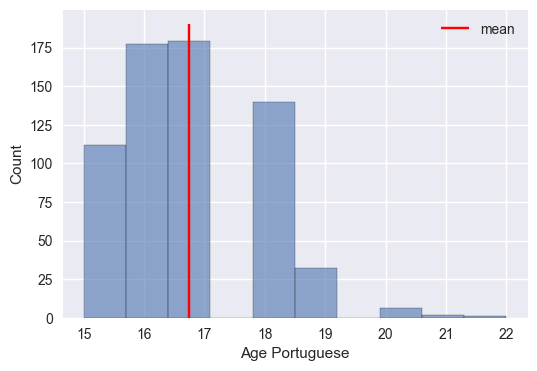

In [32]:
plt.figure(figsize=(6,4))
portuguese.age.hist(edgecolor='black',alpha=0.6)
plt.vlines(np.mean(portuguese.age),ymin=0,ymax=190,label='mean',colors='red')
plt.xlabel('Age Portuguese')
plt.ylabel('Count')
plt.legend()
plt.show()

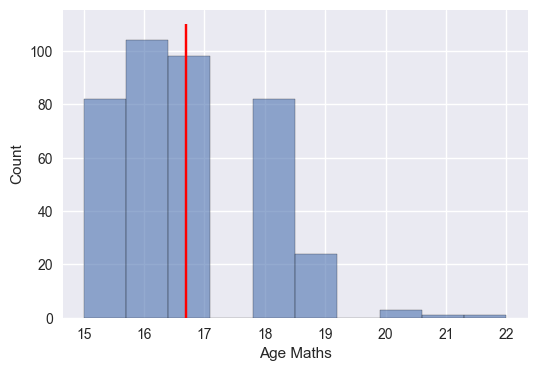

In [33]:
plt.figure(figsize=(6,4))
maths.age.hist(edgecolor='black',alpha=0.6)
plt.vlines(np.mean(maths.age),ymin=0,ymax=110,label='mean',colors='red')
plt.xlabel('Age Maths')
plt.ylabel('Count')
plt.show()

3) Mother education distribution

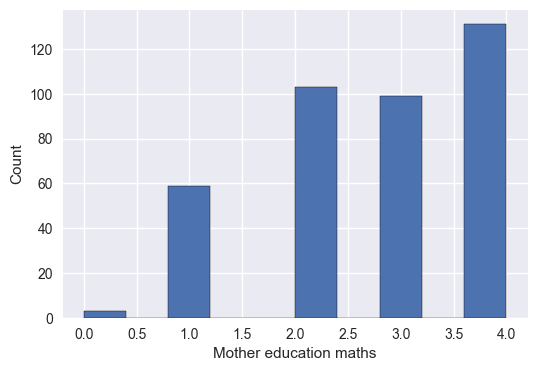

In [ ]:
plt.figure(figsize=(6,4))
maths.Mother_education.hist(edgecolor='black')
plt.xlabel('Mother education maths')
plt.ylabel('Count')
plt.show()

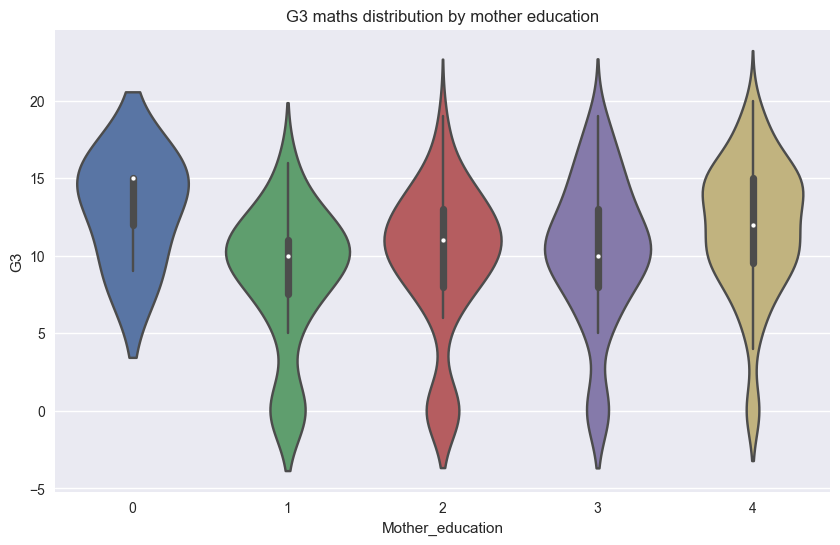

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='Mother_education',y='G3',dodge=True)
plt.title('G3 maths distribution by mother education')
plt.show()

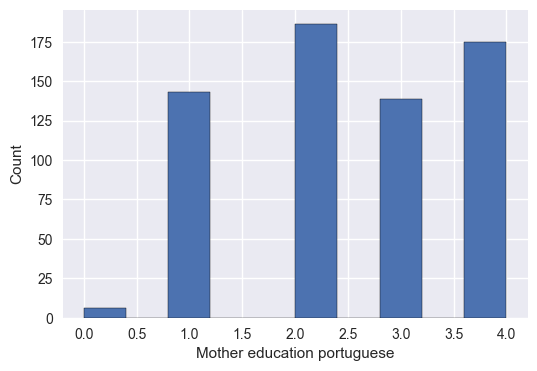

In [ ]:
plt.figure(figsize=(6,4))
portuguese.Mother_education.hist(edgecolor='black')
plt.xlabel('Mother education portuguese')
plt.ylabel('Count')
plt.show()

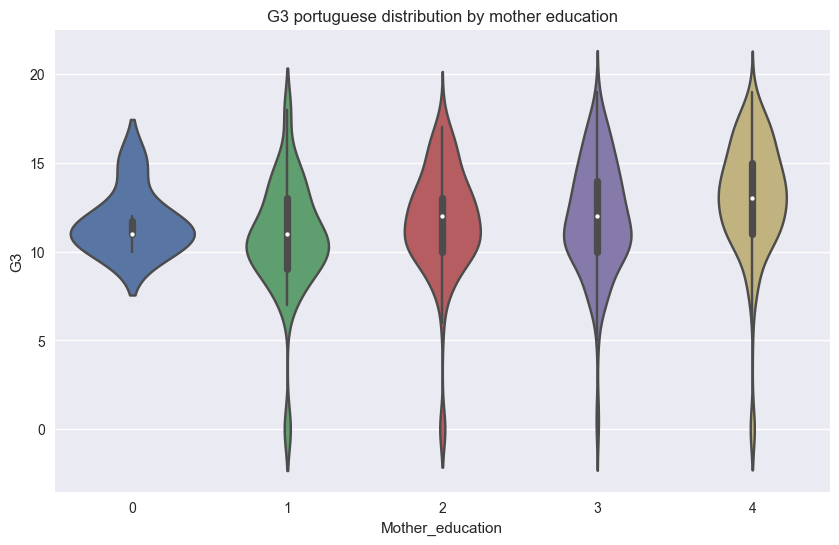

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='Mother_education',y='G3',dodge=True)
plt.title('G3 portuguese distribution by mother education')
plt.show()

__Grades distribution are better as the mother education increases.__

Absences day distribution by gender

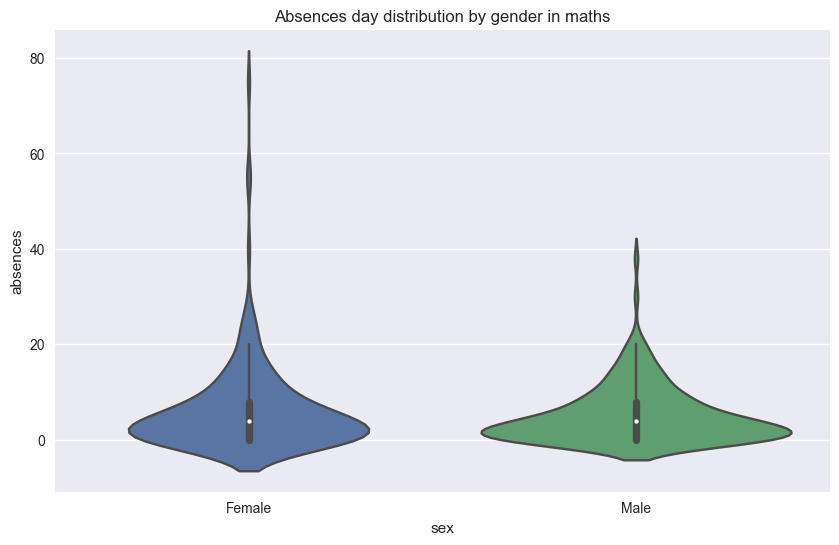

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='sex',y='absences',dodge=True)
plt.title('Absences day distribution by gender in maths')
plt.show()

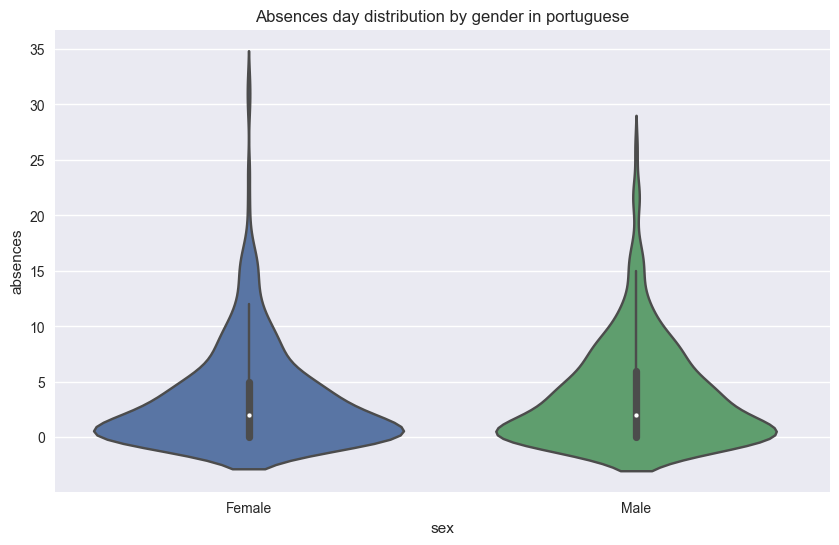

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='sex',y='absences',dodge=True)
plt.title('Absences day distribution by gender in portuguese')
plt.show()

Grades distribution by drinking day during weekend and workday

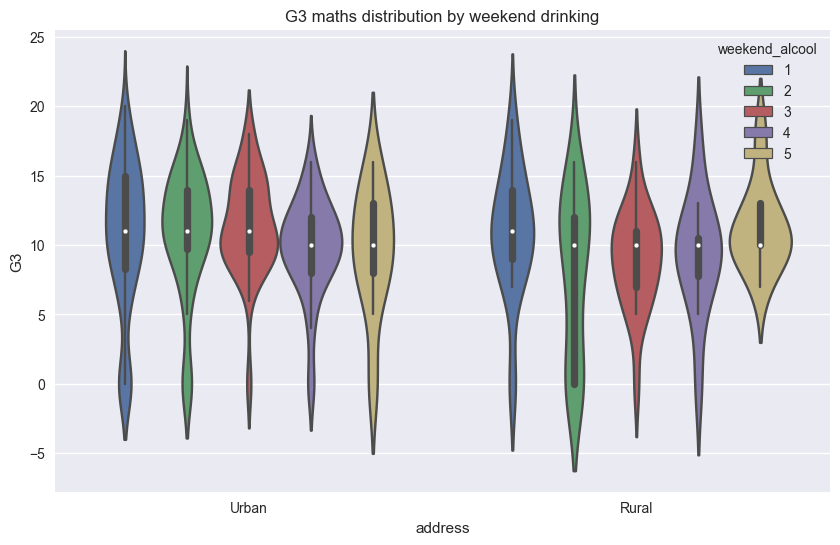

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='address',y='G3',dodge=True,hue='weekend_alcool')
plt.title('G3 maths distribution by weekend drinking')
plt.show()

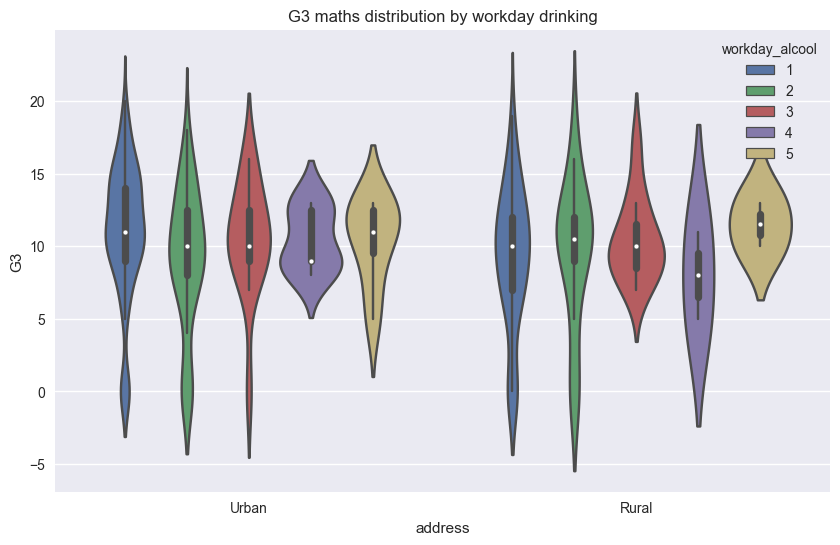

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(maths,x='address',y='G3',dodge=True,hue='workday_alcool')
plt.title('G3 maths distribution by workday drinking')
plt.show()

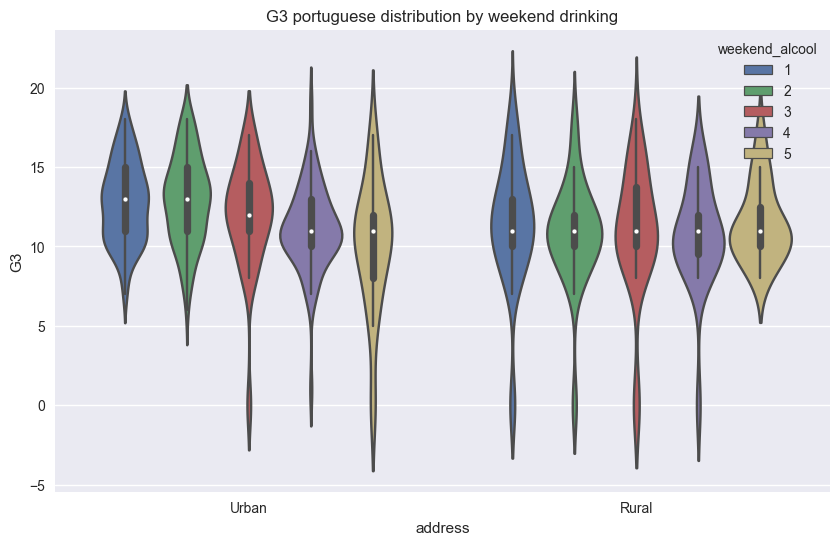

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='address',y='G3',dodge=True,hue='weekend_alcool')
plt.title('G3 portuguese distribution by weekend drinking')
plt.show()

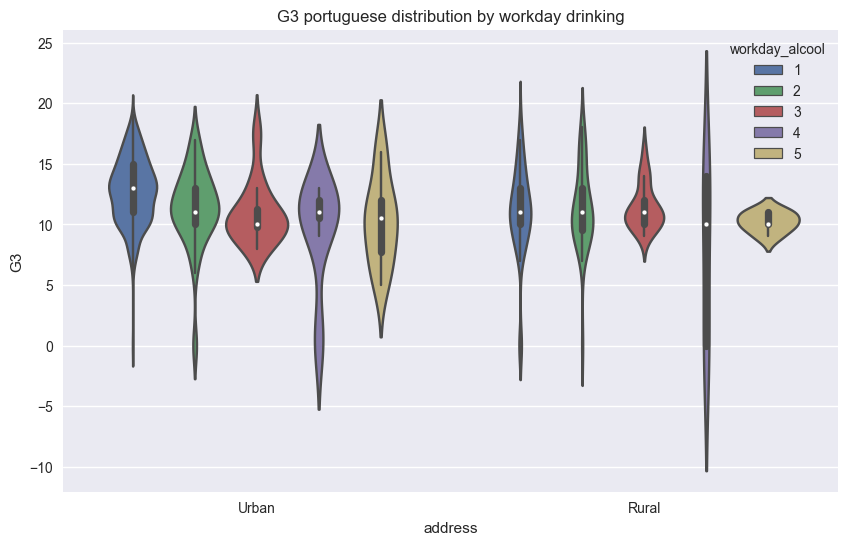

In [ ]:
plt.figure(figsize=(10,6))
sns.violinplot(portuguese,x='address',y='G3',dodge=True,hue='workday_alcool')
plt.title('G3 portuguese distribution by workday drinking')
plt.show()

Grades tend to decreased as the drinking goes up.(Dispite one outlier for the maths grade 3 in the rural area!)  

__Let's dive more into some corrolation process to find some trends.__

__First, let's check for the maths table__

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of original df
maths_encoded = maths.copy()

# Create LabelEncoder
label_encoder = LabelEncoder()

# Encoding every 'object' attributes for corr()
for col in maths_encoded.columns:
    if maths_encoded[col].dtype == 'object':  # Vérifiez si la colonne est catégorielle
        maths_encoded[col] = label_encoder.fit_transform(maths_encoded[col])

In [ ]:
heat_maths = maths_encoded.corr('pearson')[['absences','G1','G2','G3','studytime','failures','sex']]

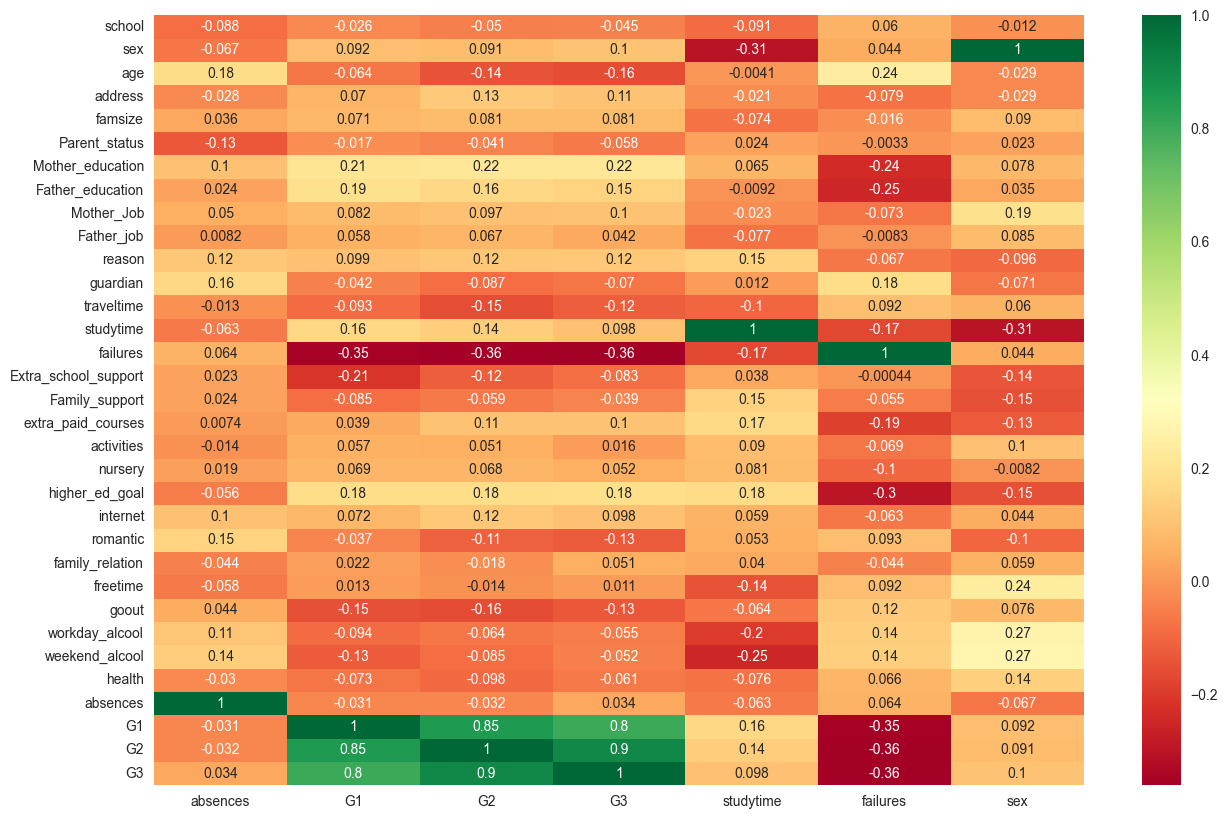

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(heat_maths,cmap='RdYlGn',annot=True)
plt.show()

__Attributes that negatively affect grades 1,2 and 3:__

For the __maths grade (G1,G2 and G3)__, with a corrolation factor of -0.35 and -0.36 with failures, there is a trend that the more subject the student failed, the less likely the grade is to be hight which is logic. 

We also notice a corrolation factor going from -0.13 to -0.16 with goout for G1,G2 and G3, which means that there is a small trend saying the more the student go out, the lower the grade is going to be.

For the G1, we see a corrolation factor of -0.13 between G1 and weekend_alcool, which underlines a small trend between drinking on the weekend and having a low grade. 

Finally the age has a corrolation factor of -0.14 and -0.16 with G2 and G3 showing that the older the student is, the less likely he is to have a good grade (because of failures I think).


The more traveltime, the less likely the student is to have a good grade with corrolation factor of -0.15 and -0.12.

__Attributes that positively affect grades 1,2 and 3:__

If student have higher_education goal, the grade tend to be better (corrolation factor of 0.18 for the 3 grades).

The more studytime, the better the grade tend to be (corrolation factor of 0.14 and 0.16 for grades 1 and 2).

The better the mother and father education, the better the grade tend to be (corrolation factor going from 0.15 to 0.22).

The reason also is a trend as the higher the reason is the better the grade tend to be (encoding makes that for high encoding, reason of higher education).

__Attributes that negatively affect studytime:__

The more a student drink during the weekend, the less he tend to work as the trend shows (corrolation factor -0.25 between weekday_alcool and studytime)

The more a student drink during the week, the less he tend to work as the trend shows (corrolation factor -0.2 between workday_alcool and studytime)

The more a student has freetime after school, the less he tends to work (corrolation factor of -0.14 between freetime and studytime)

The traveltime also affect the studytime (corrolation factor of -0.1 between traveltime and studytime)

The number of failures affect the studytime (corrolation factor of -0.17) which is logic as failing student tend to work less.

Finally, the sex has the biggest impact on the studytime (corrolation factor of -0.31). The male having the encoding number 1, it means that male are less likely to study long than female.

__Attributes that positively affect studytime:__

The more the student has a higher education goal, the more likely he/she is to study more (corrolation factor of 0.18)

The more the student has extra paid course, the most likely he/she is to study more (corrolation factor of 0.17)

The more family support, the more likely the student is to study hard (corrolation factor of 0.15 with family_support)


__Attributes that affect failing__

Having higher education goal (corrolation factor of -0.3), extrapaid courses (corrolation factor of -0.19), more studytime (corrolation factor of -0.17), highly educated mother (corrolation factor of -0.24) or father (corrolation factor of -0.25) reduces the likelyhood to have failures in some subjects.

the more you go out (corrolation factor of 0.12), the more you drink (corrolation factor of 0.14),or if your guardian is your father (corrolation factor of 0.18) (because the encoding number for the father is 1), yhe oler you are (corrolation factor of 0.24), the more likely you are to fail some subjects.

__Now let's check for the portuguese dataframe__

In [ ]:
# Create a copy of original df
portuguese_encoded = portuguese.copy()

# Create LabelEncoder
label_encoder = LabelEncoder()

# Encoding every 'object' attributes for corr()
for col in portuguese_encoded.columns:
    if portuguese_encoded[col].dtype == 'object':  # Vérifiez si la colonne est catégorielle
        portuguese_encoded[col] = label_encoder.fit_transform(portuguese_encoded[col])

In [ ]:
heat_portuguese = portuguese_encoded.corr('pearson')[['absences','G1','G2','G3','studytime','failures','sex']]

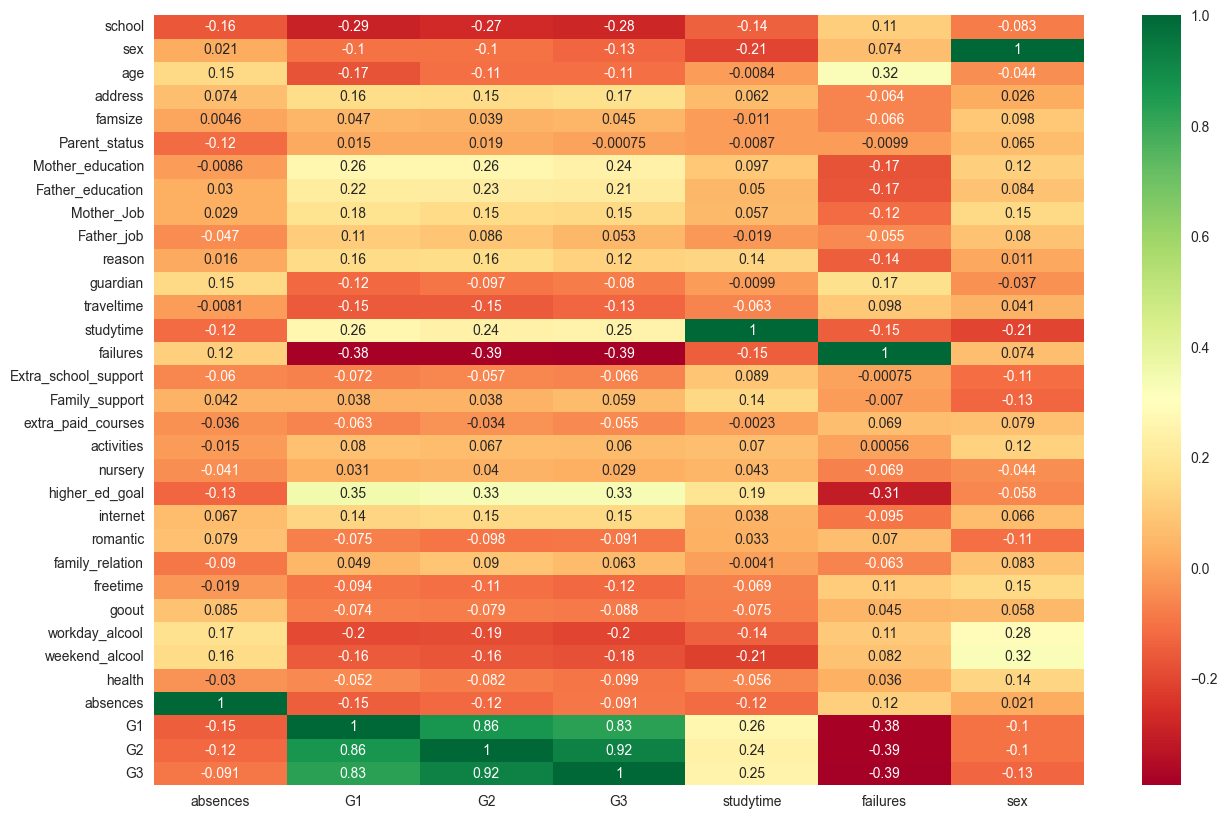

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(heat_portuguese,cmap='RdYlGn',annot=True)
plt.show()

__Attributes that negatively affect grades 1,2 and 3:__

For the __portuguese grade (G1,G2 and G3)__, with a corrolation factor of -0.38 and -0.39 with failures, there is a trend that the more subject the student failed, the less likely the grade is to be hight which is logic. 

For the G1, G2 and G3, we see a corrolation factor of -0.16 and -0.18 with weekend_alcool, and a corrolation factor of -0.19 and -0.2 with workday_alcool, which underlines a small trend between drinking and having a low grade. 

Absences have a cororlation factor of -0.15 and -0.12 for G1 and G2 which means that the more absence, the less likely the student is to have good grades.

The school has an impact going from -0.27 to -0.29 which underlines the importance of the school for portuguese.

The more traveltime, the less likely the student is to have a good grade with corrolation factor of -0.13 and -0.15.

__Attributes that positively affect grades 1,2 and 3:__

If student have higher_education goal, the grade tend to be better (corrolation factor of 0.33 and 0.35 for the 3 grades).

The more studytime, the better the grade tend to be (corrolation factor going from 0.24 to 0.26).

The better the mother and father education, the better the grade tend to be (corrolation factor going from 0.21 to 0.26).

The reason also is a trend as the higher the reason is the better the grade tend to be (encoding makes that for high encoding, reason of higher education) (corrolation factor of 0.12 and 0.16).

The adress also have an impact (living in the city or in the countryside) with a corrolation factor of 0.15, 0.16 and 0.17.

__Attributes that negatively affect studytime:__

The more a student drink during the weekend, the less he tend to work as the trend shows (corrolation factor -0.21 between weekday_alcool and studytime)

The more a student drink during the week, the less he tend to work as the trend shows (corrolation factor -0.14 between workday_alcool and studytime)

The number of failures affect the studytime (corrolation factor of -0.15) which is logic as failing student tend to work less.

The school also affect the studytime with a corrolation factor of -0.14.

Finally, the sex has an impact on the studytime (corrolation factor of -0.21). The male having the encoding number 1, it means that male are less likely to study long than female.

__Attributes that positively affect studytime:__

The more the student has a higher education goal, the more likely he/she is to study more (corrolation factor of 0.19)

The more family support, the more likely the student is to study hard (corrolation factor of 0.14 with family_support)

__Attributes that affect failing__

Having higher education goal (corrolation factor of -0.31), more studytime (corrolation factor of -0.15), highly educated mother (corrolation factor of -0.17) or father (corrolation factor of -0.17) reduces the likelyhood to have failures in some subjects.

the more you go are absent(corrolation factor of 0.12), the more you drink (corrolation factor of 0.11), if your guardian is your father (corrolation factor of 0.17) (because the encoding number for the father is 1), or if you are older (corrolation factor of 0.32), the more likely you are to fail some subjects.

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

__Conclusion about this study__

After seing more about this data study, there are some conclusion we can make.

Based on the findings from the study, here are some recommendations for students looking to achieve good grades in math and Portuguese:

**To Achieve Good Grades in Maths and Portuguese:**

**1. Set Higher Education Goals:**
   - Having a higher education goal positively correlates with better grades in both math and Portuguese.

**2. Prioritize Study Time:**
   - Allocate dedicated time for studying, as spending more time studying is associated with higher grades in both subjects.

**3. Seek Family Support:**
   - Strong family support can positively impact your academic performance in both math and Portuguese.

**4. Manage Alcohol Consumption:**
   - Limit alcohol consumption, especially on weekdays and weekends, as excessive drinking is negatively correlated with grades in both subjects.

**5. Minimize Social Activities:**
   - Be mindful of your social activities and prioritize your studies over excessive socializing, as going out frequently can negatively affect your grades.

**6. Reduce Absences:**
   - Attend school regularly and minimize absences, as higher levels of absence are associated with lower grades in Portuguese.

**7. Choose the Right School:**
   - The school you attend can impact your Portuguese grades, so consider the educational environment when making school choices.

**8. Be Consistent:**
   - Consistency in your academic efforts, study habits, and attendance can lead to better grades in both math and Portuguese.

**9. Monitor Failures:**
   - Keep an eye on your academic performance to prevent failures, as failing multiple subjects has a strong negative correlation with grades in both subjects.

**10. Consider Parental Education:**
    - If possible, leverage the positive influence of well-educated parents, as higher parental education levels are associated with better grades in both math and Portuguese.

**To Avoid:**

**1. Excessive Alcohol Consumption:**
   - Avoid excessive alcohol consumption, especially on weekdays and weekends, as it is negatively correlated with grades in both subjects.

**2. Frequent Socializing:**
   - While social activities are important, avoid going out excessively, as it can negatively impact your grades in both math and Portuguese.

**3. Skipping Study Time:**
   - Avoid neglecting your studies in favor of other activities, as spending more time studying is associated with better grades.

**4. Skipping School:**
   - Minimize absences and attend school regularly to prevent lower Portuguese grades.

**5. Failing Subjects:**
   - Take steps to prevent failures in multiple subjects, as they are strongly negatively correlated with grades in both math and Portuguese.

**6. Neglecting Family Support:**
   - If you have a strong family support system, make sure to utilize it, as it can positively influence your academic performance.

**7. Choosing a Disadvantageous School:**
   - Be cautious when selecting a school, as the school you attend can impact your Portuguese grades.


__We also can notice that the school choice and the high drinking affects way more the grades in portuguese than in maths.__